In [2]:
from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
movieData = pd.read_csv (r'movie_metadata.csv')

movieData = movieData.replace('', np.nan)
movieData_nnan=movieData.dropna()

In [93]:
movieData

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [87]:
movieData.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

nothing wrong in the types of the varibles


## univariate Analysis

In [88]:
movieData.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


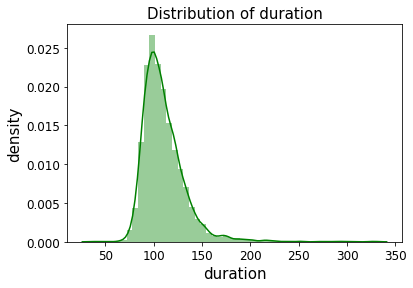

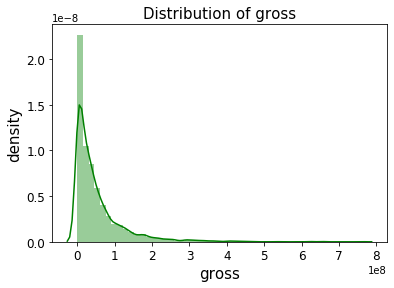

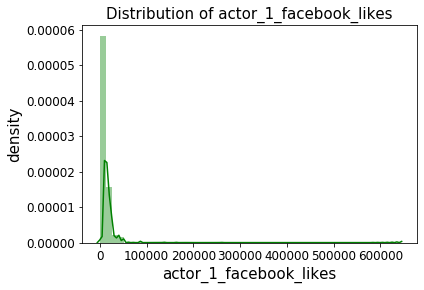

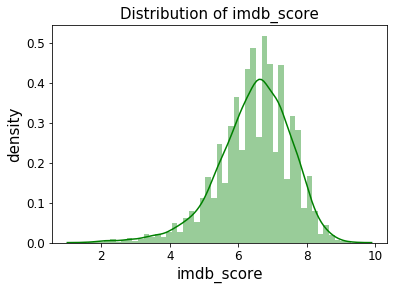

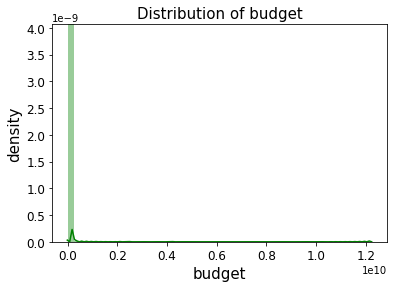

In [95]:
for col in ["duration", "gross", "actor_1_facebook_likes",'imdb_score','budget']:
    plt.figure(figsize=(6,4))
    sns.distplot(movieData_nnan[col],color='g')
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.xlabel(col, fontsize=15)
    plt.ylabel("density", fontsize=15)
    plt.title(f"Distribution of {col}", fontsize=15)

we can see that distribution of budget of gross (profits?) are not so explanatory this is due to the fact the the data sets includes both boxoffice movies and documentaries that have a significant different marketing and financial needs.
So interesting to consider only the top 5 genres, director name and actor 1 name


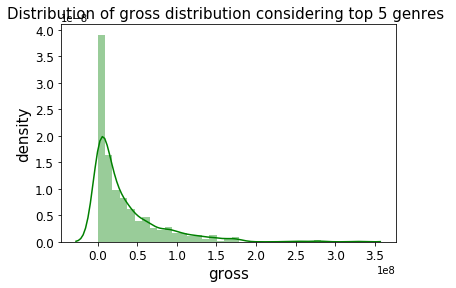

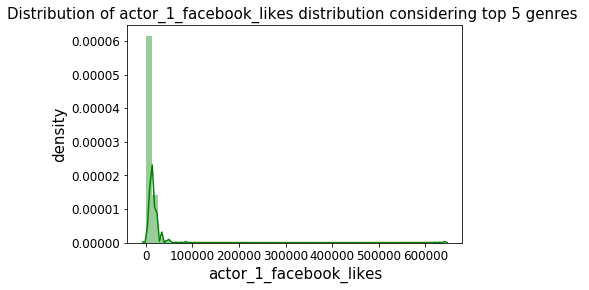

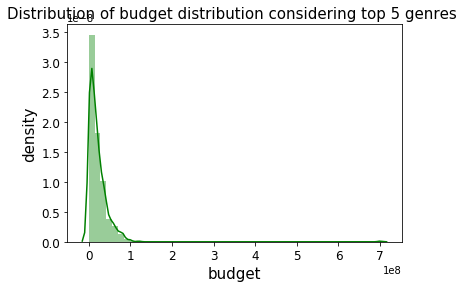

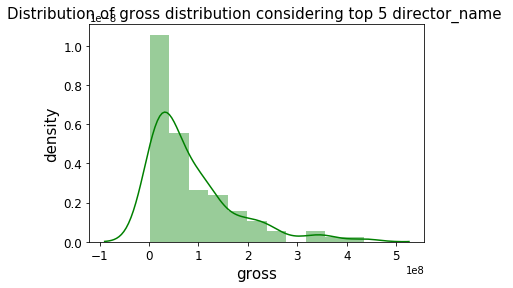

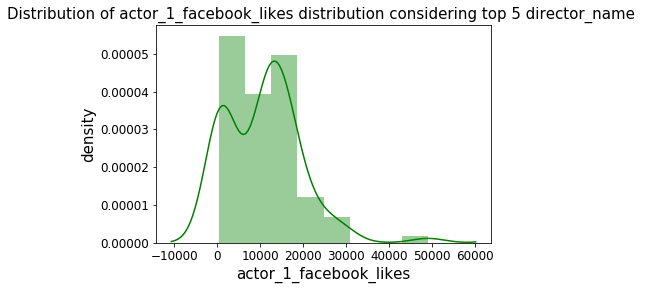

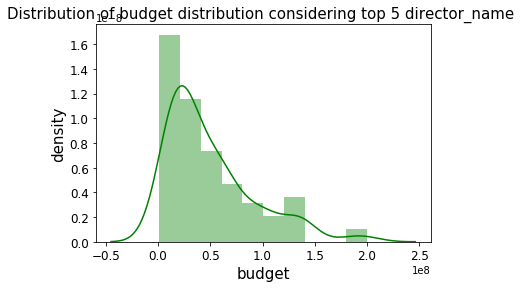

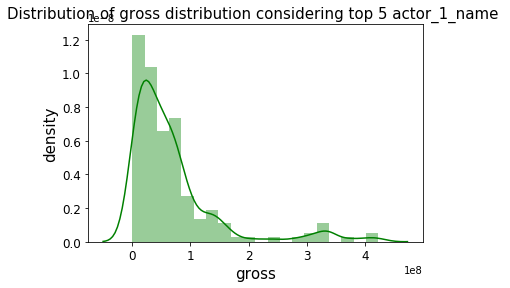

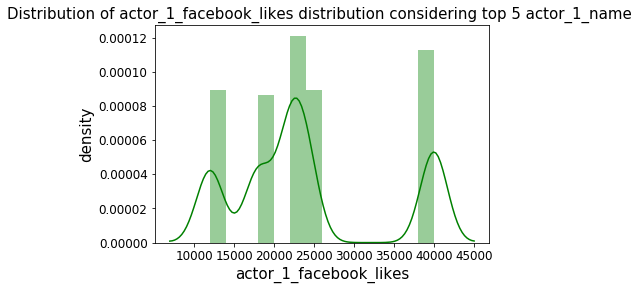

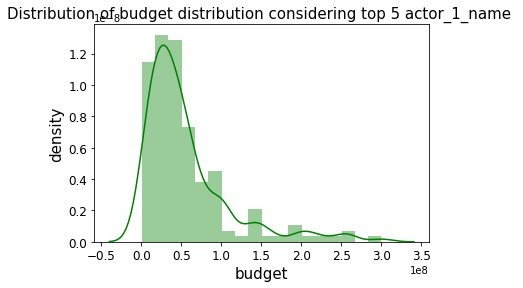

In [150]:
for col in ['genres','director_name','actor_1_name']:
    top5g=movieData_obj[col].value_counts(normalize=True).head(5)
    top5genres=movieData_nnan.loc[movieData_nnan[col].isin(top5g.index)]
    for i in ["gross", "actor_1_facebook_likes",'budget']:
        plt.figure(figsize=(6,4))
        sns.distplot(top5genres[i],color='g')
        plt.yticks(fontsize=12)
        plt.xticks(fontsize=12)
        plt.xlabel(i, fontsize=15)
        plt.ylabel("density", fontsize=15)
        plt.title(f"Distribution of {i} distribution considering top 5 {col} ", fontsize=15)

In [111]:
movieData_obj = movieData_nnan.select_dtypes(include=['O'])
for c in ['genres','director_name','actor_1_name']:
    print ("top 5 %s" % c)
    print (movieData_obj[c].value_counts(normalize=True).head())

top 5 genres
Comedy|Drama|Romance    0.039137
Drama                   0.037540
Comedy|Drama            0.036741
Comedy                  0.036741
Comedy|Romance          0.034878
Name: genres, dtype: float64
top 5 director_name
Steven Spielberg     0.006656
Woody Allen          0.005059
Clint Eastwood       0.005059
Ridley Scott         0.004526
Steven Soderbergh    0.004260
Name: director_name, dtype: float64
top 5 actor_1_name
Robert De Niro       0.011182
Johnny Depp          0.010383
Nicolas Cage         0.008253
J.K. Simmons         0.008253
Denzel Washington    0.007987
Name: actor_1_name, dtype: float64
